In [113]:
import pandas as pd
path = "C:\\Users\\foucardguimax\\Desktop\\PortFolio\\dataset.xlsx"
df = pd.read_excel(path)
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
print(df.shape)

(5644, 111)


Gros data set, il y a 111 colonnes (features) possiblement exploitables et 5644 lignes (samples). On va affichier ces colonnes.

In [115]:
list_col = df.columns
for feature in list_col:
    print(feature)

Patient ID
Patient age quantile
SARS-Cov-2 exam result
Patient addmited to regular ward (1=yes, 0=no)
Patient addmited to semi-intensive unit (1=yes, 0=no)
Patient addmited to intensive care unit (1=yes, 0=no)
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)
Serum Glucose
Respiratory Syncytial Virus
Influenza A
Influenza B
Parainfluenza 1
CoronavirusNL63
Rhinovirus/Enterovirus
Mycoplasma pneumoniae
Coronavirus HKU1
Parainfluenza 3
Chlamydophila pneumoniae
Adenovirus
Parainfluenza 4
Coronavirus229E
CoronavirusOC43
Inf A H1N1 2009
Bordetella pertussis
Metapneumovirus
Parainfluenza 2
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Influenza B, rapid test
Influenza A, rapid test
Alanine transaminase
Aspartate transaminase
Gamma-glutamyltransfe

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


On voit ici que 70 des colonnes sont des numerical data, possiblement 4 sont des categorical mais arrangés de façon numérique, et 37 sont possiblement des categorical.

In [117]:
print(df.describe(include='all'))

             Patient ID  Patient age quantile SARS-Cov-2 exam result  \
count              5644           5644.000000                   5644   
unique             5644                   NaN                      2   
top     a34d12251a0e800                   NaN               negative   
freq                  1                   NaN                   5086   
mean                NaN              9.318391                    NaN   
std                 NaN              5.777903                    NaN   
min                 NaN              0.000000                    NaN   
25%                 NaN              4.000000                    NaN   
50%                 NaN              9.000000                    NaN   
75%                 NaN             14.000000                    NaN   
max                 NaN             19.000000                    NaN   

        Patient addmited to regular ward (1=yes, 0=no)  \
count                                      5644.000000   
unique             

On voit ici que tout n'est pas affiché, on va essayé de voir pour toutes les colonnes le nombre de données renseignées (ie, le nbr de missing values).

In [118]:
description = df.describe(include='all') # C'est un dataset
for i in range(description.shape[1]):
    print(str(list_col[i]) + " --> " + str(description.iloc[0,i]))

Patient ID --> 5644
Patient age quantile --> 5644.0
SARS-Cov-2 exam result --> 5644
Patient addmited to regular ward (1=yes, 0=no) --> 5644.0
Patient addmited to semi-intensive unit (1=yes, 0=no) --> 5644.0
Patient addmited to intensive care unit (1=yes, 0=no) --> 5644.0
Hematocrit --> 603.0
Hemoglobin --> 603.0
Platelets --> 602.0
Mean platelet volume  --> 599.0
Red blood Cells --> 602.0
Lymphocytes --> 602.0
Mean corpuscular hemoglobin concentration (MCHC) --> 602.0
Leukocytes --> 602.0
Basophils --> 602.0
Mean corpuscular hemoglobin (MCH) --> 602.0
Eosinophils --> 602.0
Mean corpuscular volume (MCV) --> 602.0
Monocytes --> 601.0
Red blood cell distribution width (RDW) --> 602.0
Serum Glucose --> 208.0
Respiratory Syncytial Virus --> 1354
Influenza A --> 1354
Influenza B --> 1354
Parainfluenza 1 --> 1352
CoronavirusNL63 --> 1352
Rhinovirus/Enterovirus --> 1352
Mycoplasma pneumoniae --> 0.0
Coronavirus HKU1 --> 1352
Parainfluenza 3 --> 1352
Chlamydophila pneumoniae --> 1352
Adenovirus

Visiblement il y a des colonnes sans valeurs à l'intérieur, on va les supprimer.

In [119]:
for i in range(df.shape[1]):
    if description.iloc[0,i] == 0.0:
        df = df.drop(str(list_col[i]), axis = 1)
        print(list_col[i])
print(df.shape)

Mycoplasma pneumoniae
Urine - Sugar
Partial thromboplastin time (PTT) 
Prothrombin time (PT), Activity
D-Dimer
(5644, 106)


Ok on à supprimé ces colonnes car elle n'ont aucune valeur à l'intérieur. On va maintenant regrouper les colonnes par nombre de features.

In [120]:
dic = {}
nbr_rows = description.iloc[0,:]
for i in range(nbr_rows.shape[0]):
    if nbr_rows.iloc[i] not in dic:
        dic[nbr_rows.iloc[i]] = []
    dic[nbr_rows.iloc[i]].append(nbr_rows.index[i])
dic

{5644: ['Patient ID',
  'Patient age quantile',
  'SARS-Cov-2 exam result',
  'Patient addmited to regular ward (1=yes, 0=no)',
  'Patient addmited to semi-intensive unit (1=yes, 0=no)',
  'Patient addmited to intensive care unit (1=yes, 0=no)'],
 603.0: ['Hematocrit', 'Hemoglobin'],
 602.0: ['Platelets',
  'Red blood Cells',
  'Lymphocytes',
  'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
  'Leukocytes',
  'Basophils',
  'Mean corpuscular hemoglobin (MCH)',
  'Eosinophils',
  'Mean corpuscular volume (MCV)',
  'Red blood cell distribution width (RDW)'],
 599.0: ['Mean platelet volume '],
 601.0: ['Monocytes'],
 208.0: ['Serum Glucose'],
 1354: ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B'],
 1352: ['Parainfluenza 1',
  'CoronavirusNL63',
  'Rhinovirus/Enterovirus',
  'Coronavirus HKU1',
  'Parainfluenza 3',
  'Chlamydophila pneumoniae',
  'Adenovirus',
  'Parainfluenza 4',
  'Coronavirus229E',
  'CoronavirusOC43',
  'Inf A H1N1 2009',
  'Bordetella pertussis',


Let's look into at the target: SARS-Cov-2 exam result

In [121]:
df.iloc[:,2].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [122]:
print(df.iloc[:,2].value_counts().iloc[1]/df.iloc[:,2].value_counts().iloc[0])

0.10971293747542273


Around 10% of people in this dataset where tested positive to the COVID test.
We still need to remove features from this dataset.

In [123]:
df.iloc[:,3].value_counts()

0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64

In [124]:
df.loc[(df['Patient addmited to regular ward (1=yes, 0=no)'] == 1) & (df['SARS-Cov-2 exam result'] == 'positive'), ['Patient addmited to regular ward (1=yes, 0=no)','SARS-Cov-2 exam result']].shape

(36, 2)

In [125]:
df.iloc[:,4].value_counts()

0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64

In [126]:
df.loc[(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1) & (df['SARS-Cov-2 exam result'] == 'positive'), ['Patient addmited to semi-intensive unit (1=yes, 0=no)','SARS-Cov-2 exam result']].shape

(8, 2)

In [127]:
df.iloc[:,5].value_counts()

0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64

In [128]:
df.loc[(df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1) & (df['SARS-Cov-2 exam result'] == 'positive'), ['Patient addmited to intensive care unit (1=yes, 0=no)','SARS-Cov-2 exam result']].shape

(8, 2)

Pas besoin de ces 3 dernières colonnes, elle indiquent les patients hospitalisés mais ne permettent pas de déterminer si oui ou non un patient est infecté.

In [129]:
df = df.drop(['Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient ID'], axis = 1)
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'negative':0,'positive':1})
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il serrait interessant de savoir ou sont les Missing Values dans ce dataset.

In [135]:
for i in range(len(df.values)):
    if (df.iloc[i,1] == 0) & (df.iloc[i,2:].isnull == True):
        print("ok")

In [145]:
useless_lines = []
for i in range(df.shape[0]):
    row_df = df.loc[i,:].isna().value_counts()
    if row_df.iloc[0] == 100:
        useless_lines.append(i)

In [146]:
print(len(useless_lines))

3543


Visiblement, sur 3543 lignes du dataset ne sont renseigné que les deux premières colonnes.

In [148]:
for i in range(df.shape[1]):
    print(df.iloc[0,i])

13
0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


Et c'est bien vérifié !

In [149]:
print(df.iloc[:,0].value_counts())

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64


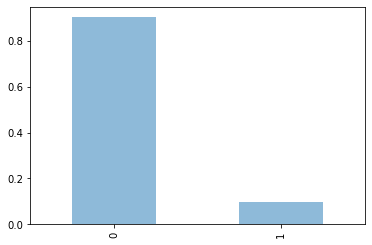

In [150]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)

In [152]:
path = 'C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\heart.csv'
heart_data = pd.read_csv(path)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age -- > age in years
- sex -- > (1 = male; 0 = female)
- cp -- > chest pain type
- trestbps -- > resting blood pressure (in mm Hg on admission to the hospital)
- chol -- > serum cholestoral in mg/dl
- fbs -- > (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg -- > resting electrocardiographic results
- thalach -- > maximum heart rate achieved
- exang -- > exercise induced angina (1 = yes; 0 = no)
- oldpeak -- > ST depression induced by exercise relative to rest
- slope -- > the slope of the peak exercise ST segment
- ca -- > number of major vessels (0-3) colored by flourosopy
- thal -- > 3 = normal; 6 = fixed defect; 7 = reversable defect
- target -- > 1 or 0

let's explore the dataset:

In [153]:
print(heart_data.shape)

(303, 14)


In [155]:
heart_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset looks already cleaned: No missing values, every rows has the same amount of features, numerical data already turned to numerical. We can start to look deeper by presenting some graphs:

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

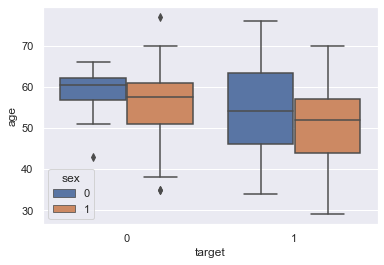

In [174]:
sns.boxplot(x = 'target',y = 'age', hue ='sex', data=heart_data)

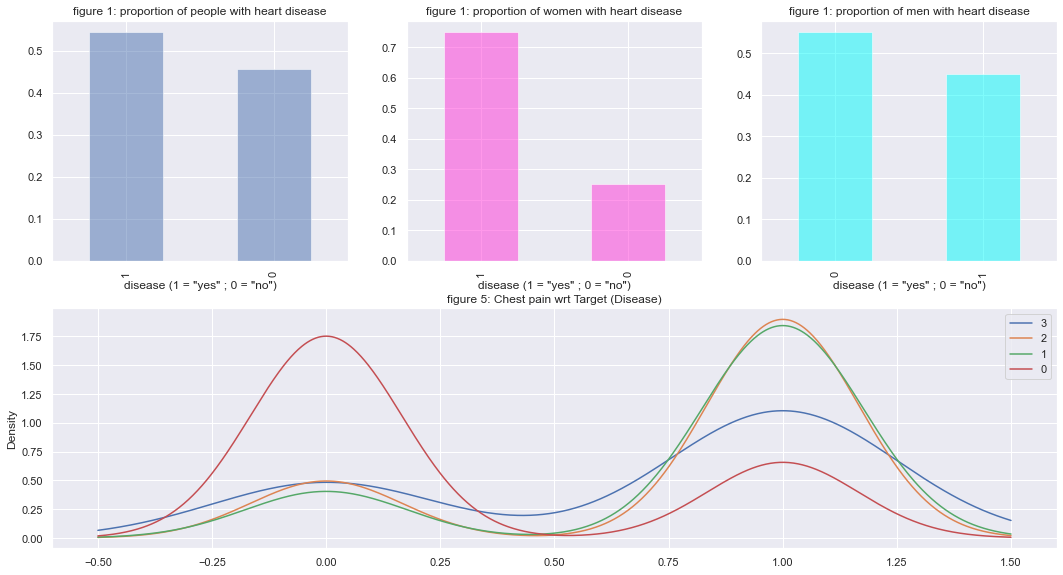

In [212]:
fig = plt.figure(figsize=(18,15))
female_color = "#FF33D7"
male_color = "#00FAFA"
sex_color = "#FA7D00"

plt.subplot2grid((3,3),(0,0))
heart_data['target'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 1: proportion of people with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(0,1))
heart_data['target'].loc[heart_data['sex'] == 0].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color = female_color)
plt.title('figure 1: proportion of women with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(0,2))
heart_data['target'].loc[heart_data['sex'] == 1].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color = male_color)
plt.title('figure 1: proportion of men with heart disease')
plt.xlabel('disease (1 = "yes" ; 0 = "no")')

plt.subplot2grid((3,3),(1,0),colspan = 4)
for x in heart_data['cp'].unique():
    heart_data['target'].loc[heart_data['cp'] == x].plot(kind='kde') # Kernel Density Estimation
plt.title("figure 5: Chest pain wrt Target (Disease)")
plt.legend(heart_data['cp'].unique())

Text(0.5, 1.0, 'figure 1: thalach of the patients diagnosed with disease')

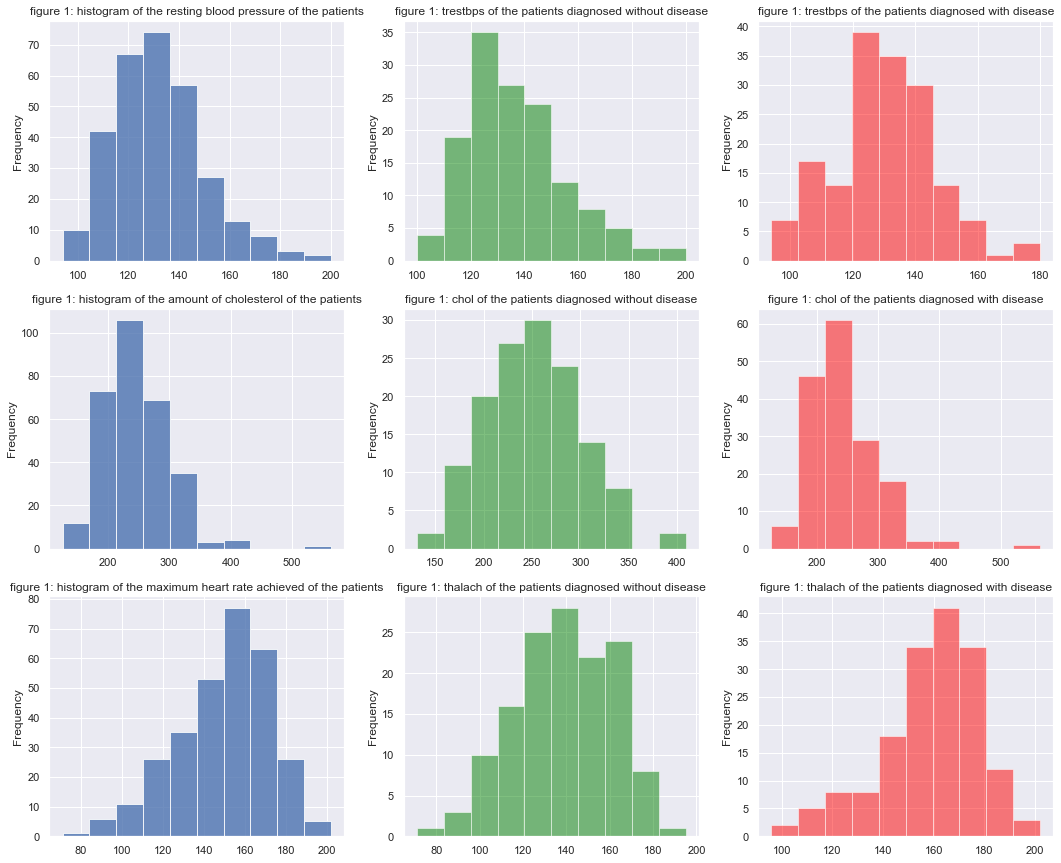

In [229]:
fig = plt.figure(figsize=(18,15))

plt.subplot2grid((3,3),(0,0))
heart_data['trestbps'].plot(kind='hist', alpha = 0.8)
plt.title('figure 1: histogram of the resting blood pressure of the patients')

plt.subplot2grid((3,3),(0,1))
heart_data['trestbps'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 1: trestbps of the patients diagnosed without disease')

plt.subplot2grid((3,3),(0,2))
heart_data['trestbps'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')
plt.title('figure 1: trestbps of the patients diagnosed with disease')

plt.subplot2grid((3,3),(1,0))
heart_data['chol'].plot(kind='hist', alpha = 0.8)
plt.title('figure 1: histogram of the amount of cholesterol of the patients')

plt.subplot2grid((3,3),(1,1))
heart_data['chol'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 1: chol of the patients diagnosed without disease')

plt.subplot2grid((3,3),(1,2))
heart_data['chol'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')
plt.title('figure 1: chol of the patients diagnosed with disease')

plt.subplot2grid((3,3),(2,0))
heart_data['thalach'].plot(kind='hist', alpha = 0.8)
plt.title('figure 1: histogram of the maximum heart rate achieved of the patients')

plt.subplot2grid((3,3),(2,1))
heart_data['thalach'].loc[heart_data['target'] == 0].plot(kind='hist', alpha = 0.5, color = 'green')
plt.title('figure 1: thalach of the patients diagnosed without disease')

plt.subplot2grid((3,3),(2,2))
heart_data['thalach'].loc[heart_data['target'] == 1].plot(kind='hist', alpha = 0.5, color = 'red')

plt.title('figure 1: thalach of the patients diagnosed with disease')

Given the previous graphs, seems like the features tested can be linked to the target. In the next part, we will only considered the tested features.

In [230]:
features = heart_data[['age', 'sex', 'cp', 'trestbps','chol','thalach']]
target = heart_data['target']
print(features.shape, target.shape)

(303, 6) (303,)


In [232]:
# Import the relevant libraries
#_______________________________________________#
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Declare the variables
#_______________________________________________#
X_not_scaled = features
y = target

# Preprocess the data
#_______________________________________________#
scaler = MinMaxScaler() # We create a scaler object here, we now need to fit it to the data and then transform the data...
X_scaled = scaler.fit_transform(X_not_scaled) # this is done in one line with the "fit_transform" command.

# Split the data
#_______________________________________________#
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42) # In order to, later, evaluate our model, we need to split the data into two:
# ...One train_set on which we are going to train our models
# ...One test_set on which we are goind to test it's accuracy and capacity of prediction
# Here we will have 80% of the initial data in the train_set, and 20% in the test_set.
cv = KFold(4, random_state = 42, shuffle = True) # We will also use a cross_validation method to train our data more efficiently


model_Tree = DecisionTreeClassifier() # Here is the model of LogisticRegression with the chosen hyperparameters
model_Tree.fit(X_train,y_train) # We first need to train the model on the train_set
model_Tree.score(X_test,y_test) # And then we can evaluate it on data it never seen.

0.7213114754098361